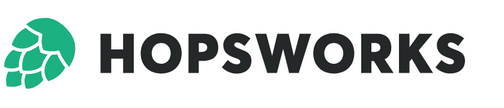

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [1]:
#!pip install -U hopsworks --quiet

In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/21674
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2023-04-05 12:47:40.694660
2023-04-06 12:47:40.694674


In [4]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

In [5]:
print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `serverless_ml_tuts_99_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `serverless_ml_tuts_99_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_m

In [6]:
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
transactions_df

2023-04-06 12:48:07,090 INFO: USE `serverless_ml_tuts_99_featurestore`
2023-04-06 12:48:08,318 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `serverless_ml_tuts_99_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `serverless_ml_tuts_99_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`
WHERE `fg2`.`datetime` >= 1680698860694 AND `fg2`.`datetime` <= 1680785260694) NA
WHERE `pit_rank_hopsworks` = 1

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,58377b0646e09f0eab738a84d00d504f,1680713660000,4003456744416606,8,0.002190,0.458974,0.274097,0.067249,0.000860,0.007086,0.006896,0.006896,0.379067
1,be6422952ccd26c105e2bad8e3ee2000,1680715755000,4003456744416606,4,0.002958,0.088598,0.318802,0.107699,0.000258,0.006747,0.006557,0.006557,0.169260
2,4e1ba8c26abbeadc5098348740c782ef,1680719918000,4003456744416606,1,0.002945,0.088600,0.318778,0.116046,0.000503,0.004717,0.004526,0.004526,0.176675
3,2884a697cd420021044bbb68233533d5,1680728878000,4003456744416606,5,0.000400,0.458980,0.274011,0.164781,0.000673,0.001969,0.001778,0.001778,0.261074
4,422565c52da189ac1f9a727d0e157bdd,1680733820000,4003456744416606,1,0.001528,0.458981,0.273983,0.241169,0.001048,0.004493,0.004303,0.004303,0.458100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70726,f8cbdac2831e62969aab98ec8bf6b988,1680750341000,4996553417303563,2,0.003207,0.891391,0.348257,0.050841,0.000879,0.006258,0.006068,0.006068,0.255890
70727,d7477415e853165fa542e4a291c0184e,1680749747000,4996851040334371,4,0.003091,0.535028,0.140715,0.035117,0.000094,0.006360,0.006170,0.006170,0.225286
70728,e5c3fd3871117b5b25b9660a8d807f60,1680753709000,4996851040334371,4,0.002123,0.535030,0.140693,0.194384,0.000811,0.007745,0.007555,0.007555,0.258415
70729,2c4cc5769356dc9e112fafef77ceaae2,1680710728000,4999763787658689,4,0.000811,0.045234,0.451523,0.228162,0.000026,0.003884,0.003693,0.003693,0.243047


In [7]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,8,0.002190,0.458974,0.274097,0.067249,0.000860,0.007086,0.006896,0.006896,0.379067
1,4,0.002958,0.088598,0.318802,0.107699,0.000258,0.006747,0.006557,0.006557,0.169260
2,1,0.002945,0.088600,0.318778,0.116046,0.000503,0.004717,0.004526,0.004526,0.176675
3,5,0.000400,0.458980,0.274011,0.164781,0.000673,0.001969,0.001778,0.001778,0.261074
4,1,0.001528,0.458981,0.273983,0.241169,0.001048,0.004493,0.004303,0.004303,0.458100
...,...,...,...,...,...,...,...,...,...,...
70726,2,0.003207,0.891391,0.348257,0.050841,0.000879,0.006258,0.006068,0.006068,0.255890
70727,4,0.003091,0.535028,0.140715,0.035117,0.000094,0.006360,0.006170,0.006170,0.225286
70728,4,0.002123,0.535030,0.140693,0.194384,0.000811,0.007745,0.007555,0.007555,0.258415
70729,4,0.000811,0.045234,0.451523,0.228162,0.000026,0.003884,0.003693,0.003693,0.243047


In [8]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [9]:
predictions = model.predict(features_df)

In [10]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
transactions_df['prediction'] = predictions.tolist()

In [12]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [13]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,58377b0646e09f0eab738a84d00d504f,4003456744416606,1680713660000,0,2023-04-05 12:47:40.694660
1,be6422952ccd26c105e2bad8e3ee2000,4003456744416606,1680715755000,0,2023-04-05 12:47:40.694660
2,4e1ba8c26abbeadc5098348740c782ef,4003456744416606,1680719918000,0,2023-04-05 12:47:40.694660
3,2884a697cd420021044bbb68233533d5,4003456744416606,1680728878000,0,2023-04-05 12:47:40.694660
4,422565c52da189ac1f9a727d0e157bdd,4003456744416606,1680733820000,0,2023-04-05 12:47:40.694660
...,...,...,...,...,...
70726,f8cbdac2831e62969aab98ec8bf6b988,4996553417303563,1680750341000,0,2023-04-05 12:47:40.694660
70727,d7477415e853165fa542e4a291c0184e,4996851040334371,1680749747000,0,2023-04-05 12:47:40.694660
70728,e5c3fd3871117b5b25b9660a8d807f60,4996851040334371,1680753709000,0,2023-04-05 12:47:40.694660
70729,2c4cc5769356dc9e112fafef77ceaae2,4999763787658689,1680710728000,0,2023-04-05 12:47:40.694660


In [14]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/21674/fs/21594/fg/32095


Uploading Dataframe: 0.00% |          | Rows 0/70731 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/21674/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f4294ce38b0>, None)

In [15]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,58377b0646e09f0eab738a84d00d504f,4003456744416606,1680713660000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
1,be6422952ccd26c105e2bad8e3ee2000,4003456744416606,1680715755000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
2,4e1ba8c26abbeadc5098348740c782ef,4003456744416606,1680719918000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
3,2884a697cd420021044bbb68233533d5,4003456744416606,1680728878000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
4,422565c52da189ac1f9a727d0e157bdd,4003456744416606,1680733820000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
...,...,...,...,...,...,...
70726,f8cbdac2831e62969aab98ec8bf6b988,4996553417303563,1680750341000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
70727,d7477415e853165fa542e4a291c0184e,4996851040334371,1680749747000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
70728,e5c3fd3871117b5b25b9660a8d807f60,4996851040334371,1680753709000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674
70729,2c4cc5769356dc9e112fafef77ceaae2,4999763787658689,1680710728000,0,2023-04-05 12:47:40.694660,2023-04-06 12:47:40.694674


In [16]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [17]:
print(np.asarray((unique, counts)).T)

[[    0 70645]
 [    1    86]]


In [18]:
print(counts[1])

86


In [19]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [20]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/21674/fs/21594/fg/32096


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/21674/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f4293d9dee0>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [21]:
history_df = fraud_fg.read()

2023-04-06 12:55:17,801 INFO: USE `serverless_ml_tuts_99_featurestore`
2023-04-06 12:55:18,986 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `serverless_ml_tuts_99_featurestore`.`predicted_fraud_1` `fg0`


In [22]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [23]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1 non-null      datetime64[ns]
 1   num_predicted_fraud  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 bytes


In [24]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2023-04-05 12:47:40.694,86,95


<Figure size 1500x700 with 0 Axes>

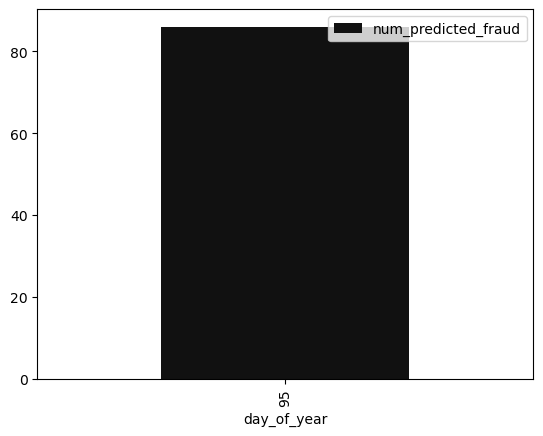

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()
